#0. Preparation

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_digits

#1. German Credit Risk

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/rezacsedu/GermanCreditRiskDataset/master/germancredit.csv',
                      names=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,1,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,1,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,1,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,1,4,4,23,3,1,1,1,1,1,1


In [0]:
print(dataset.isnull().sum())

In [0]:
print(dataset.iloc[:,20].unique())

In [0]:
X = dataset.iloc[:, 0:19].values
y = dataset.iloc[:, 20].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

dtc = DecisionTreeClassifier(criterion='entropy', random_state=1) 
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)

abc = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=1)
abc.fit(X_train, y_train)
abc_pred = abc.predict(X_test)

In [0]:
print("Accuracy of DTC: ", accuracy_score(y_test, dtc_pred))
print("Accuracy of ABC: ", accuracy_score(y_test, abc_pred))

Accuracy of DTC:  0.9366666666666666
Accuracy of ABC:  0.97


In [0]:
print("Confusion matrix of DTC:\n", confusion_matrix(y_test, dtc_pred))
print("Confusion matrix of ABC:\n", confusion_matrix(y_test, abc_pred))

Confusion matrix of DTC:
 [[281  10]
 [  9   0]]
Confusion matrix of ABC:
 [[291   0]
 [  9   0]]


#2. Handwritten Digit Recognition

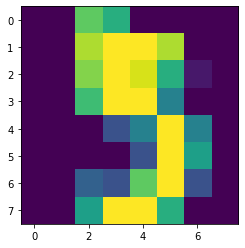

In [0]:
dataset = load_digits()

X = dataset['data']
y = dataset['target']

plt.imshow(X[5].reshape(8,8))

In [0]:
dtc = DecisionTreeClassifier(max_depth=1)
scores_dtc = cross_val_score(dtc, X, y)

abc = AdaBoostClassifier(dtc)
scores_abc = cross_val_score(abc, X, y)

print("Accuracy of DTC: ", scores_dtc.mean())
print("Accuracy of ABC: ", scores_abc.mean())

Accuracy of DTC:  0.19754874651810586
Accuracy of ABC:  0.26765552460538533
